# Datawhale 智慧海洋建设-Task5 模型融合

## 5.1 学习目标

学习融合策略

完成相应学习打卡任务

## 5.2 内容介绍

https://mlwave.com/kaggle-ensembling-guide/  
https://github.com/MLWave/Kaggle-Ensemble-Guide

模型融合是比赛后期一个重要的环节，大体来说有如下的类型方式。

1. 简单加权融合:
    - 回归（分类概率）：算术平均融合（Arithmetic mean），几何平均融合（Geometric mean）；
    - 分类：投票（Voting)


2. boosting/bagging（在xgboost，Adaboost,GBDT中已经用到）:
    - 多树的提升方法
    
    
3. stacking/blending:
    - 构建多层模型，并利用预测结果再拟合预测。

## 5.3 相关理论介绍

### 5.3.1 简单加权融合

**平均法-Averaging**

1. 对于回归问题，一个简单直接的思路是取平均。将多个模型的回归结果取平均值作为最终预测结果，进而把多个弱分类器荣和城强分类器。

2. 稍稍改进的方法是进行加权平均，权值可以用排序的方法确定，举个例子，比如A、B、C三种基本模型，模型效果进行排名，假设排名分别是1，2，3，那么给这三个模型赋予的权值分别是3/6、2/6、1/6。

3. 平均法或加权平均法看似简单，其实后面的高级算法也可以说是基于此而产生的，Bagging或者Boosting都是一种把许多弱分类器这样融合成强分类器的思想。

4. Averaging也可以用于对分类问题的概率进行平均。

**投票法-voting**

1. 对于一个二分类问题，有3个基础模型，现在我们可以在这些基学习器的基础上得到一个投票的分类器，把票数最多的类作为我们要预测的类别。

2. 投票法有硬投票（hard voting）和软投票（soft voting）

3. 硬投票: 对多个模型直接进行投票，不区分模型结果的相对重要度，最终投票数最多的类为最终被预测的类。

4. 软投票：增加了设置权重的功能，可以为不同模型设置不同权重，进而区别模型不同的重要度。


### 5.3.2 stacking/blending

#### 堆叠法-stacking 


**基本思想**：用初始训练数据学习出若干个基学习器后，将这几个学习器的预测结果作为新的训练集(第一层)，来学习一个新的学习器(第二层)。


**背景**: 为了帮助大家理解模型的原理，我们先假定一下数据背景。
1. 训练集数据大小为`10000*100`，测试集大小为`3000*100`。即训练集有10000条数据、100个特征；测试集有3000条数据、100个特征。该数据对应**回归问题**。

2. 第一层使用三种算法-XGB、LGB、NN。第二层使用GBDT。

**算法解读**
1. **stacking 第一层**

  1. XGB算法 - 对应图中`model 1`部分
    - 输入：使用训练集进行5-fold处理
    - 处理：具体处理细节如下
        - 使用1、2、3、4折作为训练集，训练一个XGB模型并预测第5折和测试集，将预测结果分别称为**XGB-pred-tran5**(shape `2000*1`)和**XGB-pred-test1**(shape `3000*1`).
        - 使用1、2、3、5折作为训练集，训练一个XGB模型并预测第4折和测试集，将预测结果分别称为**XGB-pred-tran4**(shape `2000*1`)和**XGB-pred-test2**(shape `3000*1`).
        - 使用1、2、4、5折作为训练集，训练一个XGB模型并预测第3折和测试集，将预测结果分别称为**XGB-pred-tran3**(shape `2000*1`)和**XGB-pred-test3**(shape `3000*1`).
        - 使用1、3、4、5折作为训练集，训练一个XGB模型并预测第2折和测试集，将预测结果分别称为**XGB-pred-tran2**(shape `2000*1`)和**XGB-pred-test4**(shape `3000*1`).
        - 使用2、3、4、5折作为训练集，训练一个XGB模型并预测第1折和测试集，将预测结果分别称为**XGB-pred-tran1**(shape `2000*1`)和**XGB-pred-test5**(shape `3000*1`).
    - 输出：
        - 将XGB分别对1、2、3、4、5折进行预测的结果合并，得到**XGB-pred-tran**(shape `10000*1`)。并且根据5-fold的原理可以知道，与原数据可以形成对应关系。因此在图中称为NEW FEATURE。
        - 将XGB-pred-test1 - 5 的结果使用Averaging的方法求平均值，最终得到**XGB-pred-test**(shape `3000*1`)。
    
  2. LGB算法 - 同样对应图中`model 1`部分
    - 输入：与XGB算法一致
    - 处理：与XGB算法一致。只需更改预测结果的命名即可，如**LGB-pred-tran5**和**LGB-pred-test1**
    - 输出：
        - 将LGB分别对1、2、3、4、5折进行预测的结果合并，得到**LGB-pred-tran**(shape `10000*1`)。
        - 将LGB-pred-test1 - 5 的结果使用Averaging的方法求平均值，最终得到**LGB-pred-test**(shape `3000*1`)。
        
  3. NN算法 - 同样对应图中`model 1`部分
    - 输入：与XGB算法一致
    - 处理：与XGB算法一致。只需更改预测结果的命名即可，如**NN-pred-tran5**和**NN-pred-test1**
    - 输出：
        - 将NN分别对1、2、3、4、5折进行预测的结果合并，得到**NN-pred-tran**(shape `10000*1`)。
        - 将NN-pred-test1 - 5 的结果使用Averaging的方法求平均值，最终得到**NN-pred-test**(shape `3000*1`)。

2. **stacking 第二层**
  - 训练集：将三个新特征  **XGB-pred-tran**、**LGB-pred-tran**、**NN-pred-tran**合并得到新的训练集(shape `10000*3`)
  - 测试集：将三个新测试集**XGB-pred-test**、**LGB-pred-test**、**NN-pred-test**合并得到新的测试集(shape `30000*3`)
  - 用新训练集和测试集构造第二层的预测器，即GBDT模型

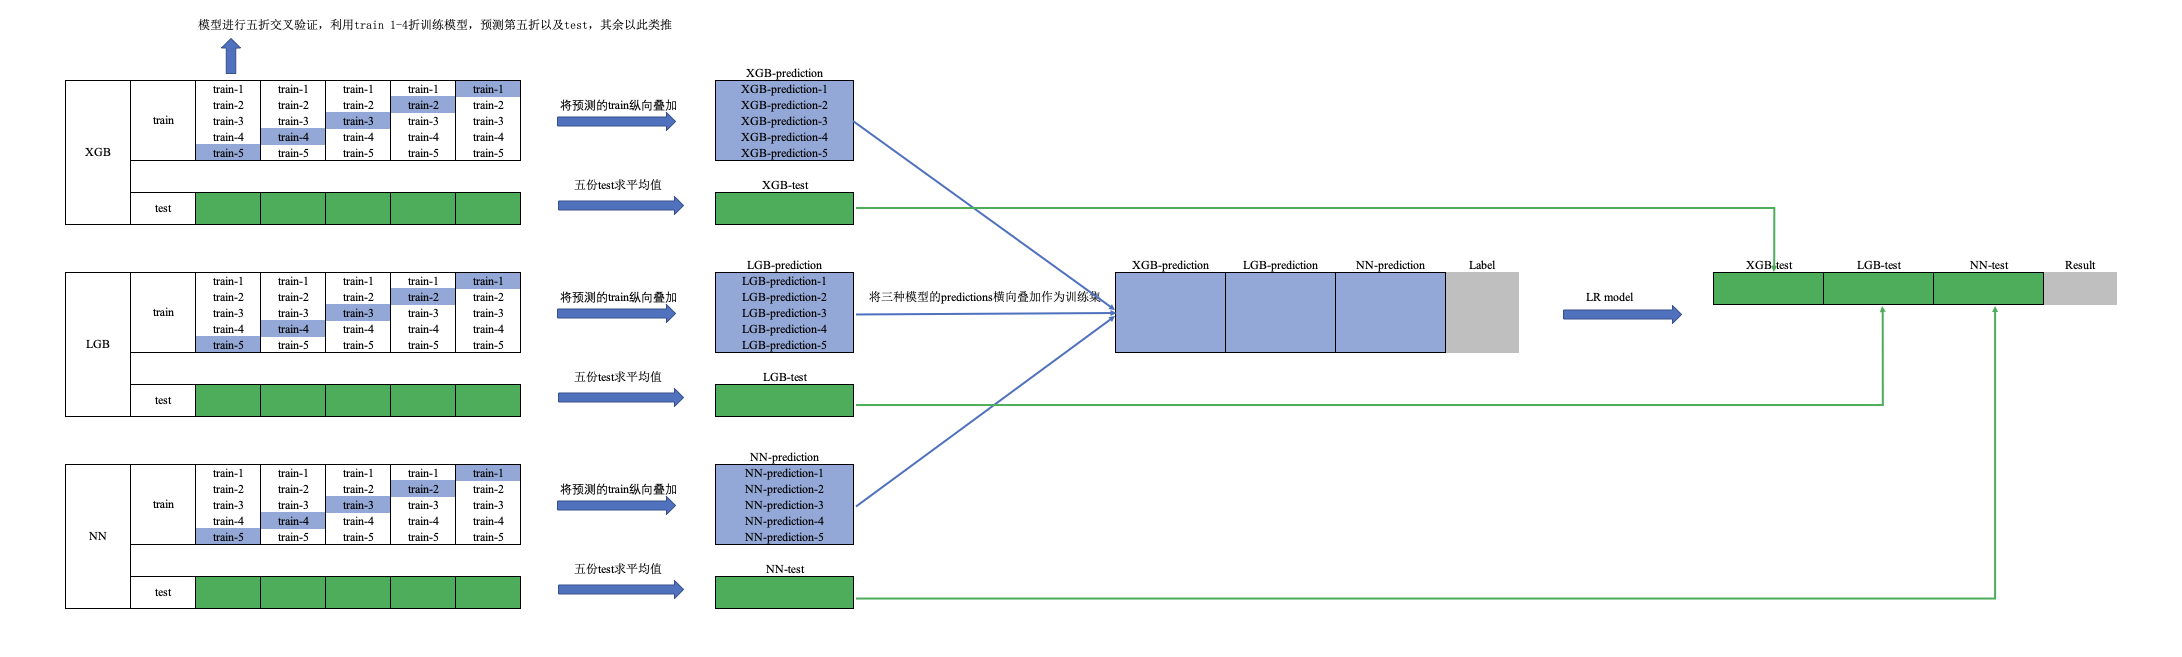

#### 混合法 - blending

Blending与Stacking大致相同，只是Blending的主要区别在于训练集不是通过K-Fold的CV策略来获得预测值从而生成第二阶段模型的特征，而是建立一个Holdout集。简单来说，Blending直接用不相交的数据集用于不同层的训练。

同样以上述数据集为例，构造一个两层的Blending模型。

首先将训练集划分为两部分(d1，d2)，例如d1为4000条数据用于blending的第一层，d2是6000条数据用于blending的第二层。

第一层：用d1训练多个模型，将其对d2和test的预测结果作为第二层的New Features。例如同样适用上述三个模型，对d2生成`6000*3`的新特征数据；对test生成`3000*3`的新特征矩阵。

第二层：用d2的New Features和标签训练新的分类器，然后把test的New Features输入作为最终的测试集，对test预测出的结果就是最终的模型融合的值。


#### 优缺点对比

Blending的优点在于：

1. 比stacking简单（因为不用进行k次的交叉验证来获得stacker feature）

2. 避开了一个信息泄露问题：generlizers和stacker使用了不一样的数据集

3. 在团队建模过程中，不需要给队友分享自己的随机种子

而缺点在于：

1. 使用了很少的数据（是划分hold-out作为测试集，并非cv）

2. blender可能会过拟合（其实大概率是第一点导致的）

3. stacking使用多次的CV会比较稳健

## 5.4 代码实现

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

import itertools
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression
# from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
# from mlxtend.plotting import plot_learning_curves
# from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 5.4.1 load data

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, KFold,train_test_split

# numpy内存优化

In [3]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
# 固定函数  没啥可看

In [4]:
all_df = pd.read_csv('数据集/group_df.csv',index_col=0)
all_df = reduce_mem_usage(all_df)
all_df = all_df.fillna(99)

Memory usage of dataframe is 30.28 MB
Memory usage after optimization is: 7.59 MB
Decreased by 74.9%


In [5]:
all_df.shape

(9000, 440)

In [6]:
all_df.head()

,ID,label,cnt,anchor_cnt,anchor_ratio,lat_min,lat_max,lat_mean,lat_median,lat_nunique,...,w2v_20_mean,w2v_21_mean,w2v_22_mean,w2v_23_mean,w2v_24_mean,w2v_25_mean,w2v_26_mean,w2v_27_mean,w2v_28_mean,w2v_29_mean
0,0,2,414,372,0.898438,40.06250,40.28125,40.06250,40.06250,23,...,5.183594,4.207031,-2.089844,-2.855469,-1.686523,1.701172,1.500000,-1.897461,1.875977,1.623047
1,1,2,385,187,0.485596,40.06250,40.21875,40.09375,40.06250,138,...,1.413086,2.259766,-0.436279,-1.192383,-0.682617,1.127930,1.210938,-0.223389,1.656250,1.078125
2,10,2,397,60,0.151123,40.21875,40.59375,40.28125,40.21875,97,...,4.050781,2.544922,-0.881836,-0.593750,-0.080688,2.097656,0.287598,-0.038818,1.786133,1.169922
3,100,2,411,67,0.162964,40.06250,40.53125,40.31250,40.34375,337,...,0.841309,0.671875,-0.587402,-0.842773,-0.349365,0.170898,0.420166,0.127808,0.514160,0.275635
4,1000,0,377,36,0.095520,41.12500,41.90625,41.75000,41.84375,257,...,0.291992,0.578613,-0.998047,-0.379395,-0.004711,0.518066,0.317871,0.060028,0.463379,0.733887


In [7]:
all_df['label'].value_counts()

 2    4361
-1    2000
 0    1621
 1    1018
Name: label, dtype: int64


all_df中label为0/1/2的为训练集，一共有7000条；label为-1的为测试集，一共有2000条。
1. label为-1的测试集没有label，这部分数据用于模拟真实比赛提交数据。

2. train数据均有标签，我们将从中分出30%作为验证集，其余作为训练集。在验证集上比较模型性能优劣，模型性能均使用f1作为评分。


In [8]:
train = all_df[all_df['label'] != -1]
test =  all_df[all_df['label'] == -1]
feats = [c for c in train.columns if c not in ['ID', 'label']]

# 根据7：3划分训练集和测试集
X_train,X_val,y_train,y_val= train_test_split(train[feats],train['label'],test_size=0.3,random_state=0) # 随机种子 除去ID 和 label的数据集和测试集

In [9]:
feats

['cnt',
 'anchor_cnt',
 'anchor_ratio',
 'lat_min',
 'lat_max',
 'lat_mean',
 'lat_median',
 'lat_nunique',
 'lat_q_10',
 'lat_q_20',
 'lat_q_30',
 'lat_q_40',
 'lat_q_60',
 'lat_q_70',
 'lat_q_80',
 'lat_q_90',
 'lon_min',
 'lon_max',
 'lon_mean',
 'lon_median',
 'lon_nunique',
 'lon_q_10',
 'lon_q_20',
 'lon_q_30',
 'lon_q_40',
 'lon_q_60',
 'lon_q_70',
 'lon_q_80',
 'lon_q_90',
 'speed_min',
 'speed_max',
 'speed_mean',
 'speed_median',
 'speed_nunique',
 'speed_q_10',
 'speed_q_20',
 'speed_q_30',
 'speed_q_40',
 'speed_q_60',
 'speed_q_70',
 'speed_q_80',
 'speed_q_90',
 'direction_min',
 'direction_max',
 'direction_mean',
 'direction_median',
 'direction_nunique',
 'direction_q_10',
 'direction_q_20',
 'direction_q_30',
 'direction_q_40',
 'direction_q_60',
 'direction_q_70',
 'direction_q_80',
 'direction_q_90',
 'pos_neq_zero_lat_min',
 'pos_neq_zero_lat_max',
 'pos_neq_zero_lat_mean',
 'pos_neq_zero_lat_median',
 'pos_neq_zero_lat_nunique',
 'pos_neq_zero_lat_q_10',
 'pos_neq

### 5.4.2 单模及加权融合

这里训练三个单模，分别是用了一个三种不同的RF/LGB/LGB模型。事实上模型融合需要基础分类器之间存在差异，一般不会选用相同的分类器模型。这里只是作为展示。

In [10]:
# 单模函数
def build_model_rf(X_train,y_train):
    model = RandomForestClassifier(n_estimators = 100)
    model.fit(X_train, y_train)
    return model


def build_model_lgb(X_train,y_train):
    model = lgb.LGBMClassifier(num_leaves=127,learning_rate = 0.1,n_estimators = 200)
    model.fit(X_train, y_train)
    return model


def build_model_lgb2(X_train,y_train):
    model = lgb.LGBMClassifier(num_leaves=63,learning_rate = 0.05,n_estimators = 400)  # n_estimators 确定森林中树的数目
    model.fit(X_train, y_train)
    return model


In [11]:
# 这里针对三个单模进行训练，其中subA_rf/lgb/nn都是可以提交的模型
# 单模没有进行调参，因此是弱分类器，效果可能不是很好。

print('predict rf ...')
model_rf = build_model_rf(X_train,y_train)
val_rf = model_rf.predict(X_val)
subA_rf = model_rf.predict(test[feats])
rf_f1_score = f1_score(y_val,val_rf,average='macro')
print(rf_f1_score)

print('predict lgb...')
model_lgb = build_model_lgb(X_train,y_train)
val_lgb = model_lgb.predict(X_val)
subA_lgb = model_lgb.predict(test[feats])
lgb_f1_score = f1_score(y_val,val_lgb,average='macro')
print(lgb_f1_score)


print('predict lgb 2...')
model_lgb2 = build_model_lgb2(X_train,y_train)
val_lgb2 = model_lgb2.predict(X_val)
subA_lgb2 = model_lgb2.predict(test[feats])
lgb2_f1_score = f1_score(y_val,val_lgb2,average='macro')
print(lgb2_f1_score)


predict rf ...
0.8884838216449321
predict lgb...
0.9144414270113281
predict lgb 2...
0.9183965870229657


In [12]:
# https://blog.csdn.net/youhuakongzhi/article/details/92840060 投票法
voting_clf = VotingClassifier(estimators=[('rf',model_rf ),
                                          ('lgb',model_lgb),
                                          ('lgb2',model_lgb2 )],voting='hard')

voting_clf.fit(X_train,y_train)
val_voting = voting_clf.predict(X_val)
subA_voting = voting_clf.predict(test[feats])
voting_f1_score = f1_score(y_val,val_voting,average='macro')
print(voting_f1_score)
# 事实证明随机森林基本上只会拖后腿

0.9147062081367228


### 5.4.3 Stacking融合

In [13]:
_N_FOLDS = 5  # 采用5折交叉验证
kf = KFold(n_splits=_N_FOLDS, random_state=42)  # sklearn的交叉验证模块，用于划分数据


def get_oof(clf, X_train, y_train, X_test):
    oof_train = np.zeros((X_train.shape[0], 1)) 
    oof_test_skf = np.empty((_N_FOLDS, X_test.shape[0], 1))   # np.empty()返回一个随机元素的矩阵，大小按照参数定义。
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)): # 交叉验证划分此时的训练集和验证集
        kf_X_train = X_train.iloc[train_index,]
        kf_y_train = y_train.iloc[train_index,]
        kf_X_val = X_train.iloc[test_index,]
        
        clf.fit(kf_X_train, kf_y_train)
 
        oof_train[test_index] = clf.predict(kf_X_val).reshape(-1, 1) 
        oof_test_skf[i, :] = clf.predict(X_test).reshape(-1, 1)  
 
    oof_test = oof_test_skf.mean(axis=0)  # 对每一则交叉验证的结果取平均
    return oof_train, oof_test  # 返回当前分类器对训练集和测试集的预测结果

In [24]:
X_val.shape

(2100, 438)

In [25]:
X_val.shape[0]

2100

In [33]:
oof_test_skf = np.empty((_N_FOLDS, X_val.shape[0],1))
oof_test_skf

array([[[1.12182321e-311],
        [1.12183067e-311],
        [2.12199579e-314],
        ...,
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000]],

       [[0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        ...,
        [0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000]],

       [[0.00000000e+000],
        [0.00000000e+000],
        [0.00000000e+000],
        ...,
        [1.12184965e-311],
        [0.00000000e+000],
        [6.95226616e-310]],

       [[1.12182003e-311],
        [0.00000000e+000],
        [0.00000000e+000],
        ...,
        [1.12180641e-311],
        [1.12184997e-311],
        [0.00000000e+000]],

       [[6.95226616e-310],
        [1.12182004e-311],
        [0.00000000e+000],
        ...,
        [0.00000000e+000],
        [1.12180641e-311],
        [1.12185030e-311]]])

In [35]:
for i, (train_index, test_index) in enumerate(kf.split(X_train)): # 交叉验证划分此时的训练集和验证集
    print((i,train_index, test_index))

(0, array([ 980,  981,  982, ..., 4897, 4898, 4899]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169

In [14]:
# 将你的每个分类器都调用get_oof函数，并把它们的结果合并，就得到了新的训练和测试数据new_train,new_test
new_train, new_test = [], []


model1 = RandomForestClassifier(n_estimators = 100)
model2 = lgb.LGBMClassifier(num_leaves=127,learning_rate = 0.1,n_estimators = 200)
model3 = lgb.LGBMClassifier(num_leaves=63,learning_rate = 0.05,n_estimators = 400)

for clf in [model1, model2, model3]:
    print(clf)
    oof_train, oof_test = get_oof(clf, X_train, y_train, X_val)
    new_train.append(oof_train)
    new_test.append(oof_test)
    
new_train = np.concatenate(new_train, axis=1)
new_test = np.concatenate(new_test, axis=1)

RandomForestClassifier()
LGBMClassifier(n_estimators=200, num_leaves=127)
LGBMClassifier(learning_rate=0.05, n_estimators=400, num_leaves=63)


In [15]:
# 用新的训练数据new_train作为新的模型的输入，stacking第二层
# 使用LogisticRegression作为第二层是为了防止模型过拟合
# 这里使用的模型还有待优化，因此模型融合效果并不是很好
clf = LogisticRegression()
clf.fit(new_train, y_train)
result = clf.predict(new_test)

stacking_f1_score = f1_score(y_val,result,average='macro')
print(stacking_f1_score)

0.8842985979629524


## 5.5 思考题

1. 如何基于stacking改进出blending - stacking使用了foldCV，blending使用了holdout.

2. stacking还可以进行哪些优化提升F1-score - 从第一层模型数量？模型差异性？角度出发

**参考内容**

https://blog.csdn.net/weixin_44585839/article/details/110148396

https://blog.csdn.net/weixin_39962758/article/details/111101263


**END.**

【 张晋 ：Datawhale成员，算法竞赛爱好者。CSDN：https://blog.csdn.net/weixin_44585839/】



关于Datawhale：

> Datawhale是一个专注于数据科学与AI领域的开源组织，汇集了众多领域院校和知名企业的优秀学习者，聚合了一群有开源精神和探索精神的团队成员。Datawhale 以“for the learner，和学习者一起成长”为愿景，鼓励真实地展现自我、开放包容、互信互助、敢于试错和勇于担当。同时 Datawhale 用开源的理念去探索开源内容、开源学习和开源方案，赋能人才培养，助力人才成长，建立起人与人，人与知识，人与企业和人与未来的联结。

本次数据挖掘路径学习，专题知识将在天池分享，详情可关注Datawhale：

![logo.png](https://img-blog.csdnimg.cn/2020090509294089.png)